In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

# Data

In [52]:
df = pd.read_csv('titanic/train.csv')
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df['male'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['embarked_S'] = df['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
df['embarked_C'] = df['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
df['embarked_Q'] = df['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)

df.drop(columns=['Sex', 'Embarked'], inplace=True)

In [55]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,embarked_S,embarked_C,embarked_Q
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Ticket      891 non-null    object 
 7   Fare        891 non-null    float64
 8   Cabin       204 non-null    object 
 9   male        891 non-null    int64  
 10  embarked_S  891 non-null    int64  
 11  embarked_C  891 non-null    int64  
 12  embarked_Q  891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 97.5+ KB


In [58]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,embarked_S,embarked_C,embarked_Q
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.722783,0.188552,0.086420
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.447876,0.391372,0.281141
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Survived'>

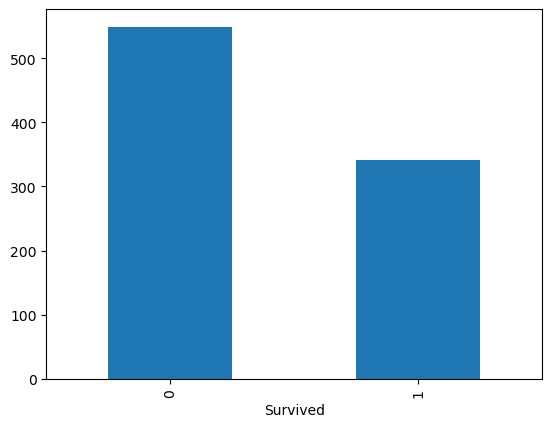

In [59]:
df['Survived'].value_counts().plot(kind='bar')

In [60]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

# Models

In [117]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [118]:
X = df[['Pclass', 'SibSp', 'Parch', 'Fare', 'male', 'embarked_S', 'embarked_C', 'embarked_Q']]
y = df[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
def gridsearch(estimator, param_grid: dict, X=X, y=y):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        n_jobs=-1,
        cv=5,
        verbose=5,
        return_train_score=True
    )
    gs.fit(X, y.values.ravel())
    results = pd.DataFrame(gs.cv_results_).sort_values(by=['mean_test_score'], ascending=False)
    print(f"Best score: {results.iloc[0]['mean_test_score']}")
    print(f"Best params: {results/iloc[0]['params']}")
    return results

## Decision Tree

In [ ]:
gridsearch

## Random Forest

In [127]:
res = gridsearch(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [10, 100, 1000],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [1000, None]
    }
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score: 0.8036281463812692


NameError: name 'iloc' is not defined

In [110]:
gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [10, 100, 1000],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [1000, None]
    },
    n_jobs=-1,
    cv=5,
    verbose=5,
    return_train_score=True
)
gs.fit(X, y.values.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1000, None],
                         'n_estimators': [10, 100, 1000]},
             return_train_score=True, verbose=5)

In [115]:
results = pd.DataFrame(gs.cv_results_).sort_values(by=['mean_test_score'], ascending=False)
print(results.iloc[0]['params'])
print(results.iloc[0]['mean_test_score'])

{'criterion': 'entropy', 'max_depth': 1000, 'n_estimators': 10}
0.8013997865796245


## Logistic Regression

In [122]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'penalty': ['l2', None],
        'class_weight': ['balanced', None],
        'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter': [10000]
    },
    n_jobs=-1,
    cv=5,
    verbose=5,
    return_train_score=True
)
gs.fit(X, y.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_iter': [10000], 'penalty': ['l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']},
             return_train_score=True, verbose=5)

In [123]:
results = pd.DataFrame(gs.cv_results_).sort_values(by=['mean_test_score'], ascending=False)
print(results.iloc[0]['params'])
print(results.iloc[0]['mean_test_score'])

{'class_weight': None, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'}
0.7923608059757705


## Support Vector Machine

## Gradient Boosted

## Multi-Layer Perceptron

## Naive Bayes